## Binary classifier

The first approach followed was just a test, trying using only two different classes and only sequence lengths of 100nts.

Unfortunately, I didn't keep the same metrics as in the other cases, so we'll have fewer analysis to complete.

I tested two different strategies:
 - Selecting only the first 100nts of each plasmid. I will call it `init`. Only one sequence per sample.
 - Selecting a random stretch of 100nts in the plasmid. I will call it `rand`. Here I include 8 random seqs per sample, so training data is 8 times larger (test data is same size, 1000 observations)
 
In both cases, the sequence was reverse complemented with probability 0.5. 

The first model I stopped it after 700 steps (this is $700*32=22400$ data points analyzed), the second one I left it running longer up to 2000 steps, but there were many more examples in the training example.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# custom functions
sys.path.append('/home/mexposit/cg/gea/transformers/trans_utils')
from analysis_utils import read_scores_from_eval

To identify which score is which I have to read lines 464-468 of the run_finetune.py script, which basically sorts the scores and I see that the order is the same at which they are printed in the logs. The way each score is computed can also be found in `/home/mexposit/cg/gea/dnabert/src/transformers/data/metrics/__init__.py` at the `acc_f1_mcc_auc_pre_rec` function

The steps at which these metrics are computed are different and they are set in the `logging_steps` flag on the command used to run the finetuning job. Here I set them manually to compute at which step each metric corresponds.

In [2]:
init_path = '/home/mexposit/cg/gea/transformers/2_geainit/model/ft_2binrand/eval_results.txt'
init_sc = read_scores_from_eval(init_path, step_freq=10)

In [3]:
rand_path = '/home/mexposit/cg/gea/transformers/3_binmulti/model/ft_3binmulti/eval_results.txt'
rand_sc = read_scores_from_eval(rand_path, step_freq=10)

In [4]:
rand_sc.head()

,acc,auc,f1,mcc,precision,recall,step
0,0.504,0.519,0.503,0.008,0.504,0.504,10
1,0.524,0.548,0.522,0.048,0.524,0.524,20
2,0.568,0.610,0.567,0.136,0.568,0.568,30
3,0.616,0.682,0.614,0.234,0.618,0.616,40
4,0.654,0.736,0.649,0.316,0.662,0.654,50


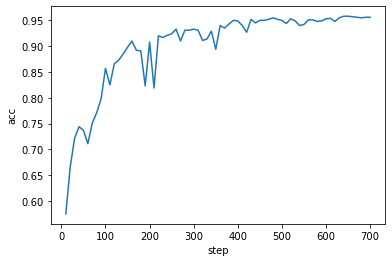

In [5]:
sns.lineplot(x='step', y='acc', data=init_sc)
plt.show()

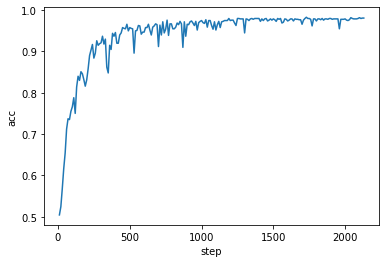

In [6]:
sns.lineplot(x='step', y='acc', data=rand_sc)
plt.show()

In [7]:
init_sc['acc'].values[-1]

0.956

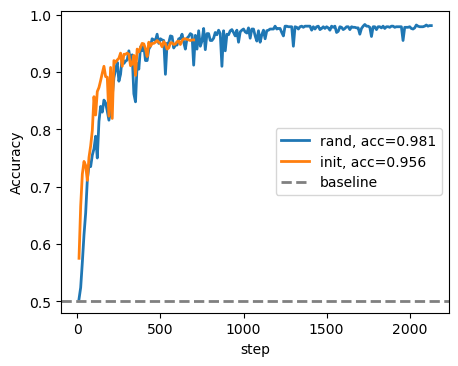

In [8]:
plt.figure(figsize=(5,4), dpi=100)
sns.lineplot(x='step', y='acc', data=rand_sc, lw=2, label=f'rand, acc={round(rand_sc["acc"].values[-1],3)}')
sns.lineplot(x='step', y='acc', data=init_sc, lw=2, label=f'init, acc={round(init_sc["acc"].values[-1],3)}')
plt.axhline(0.5,color='gray', lw=2, ls='--', label='baseline')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

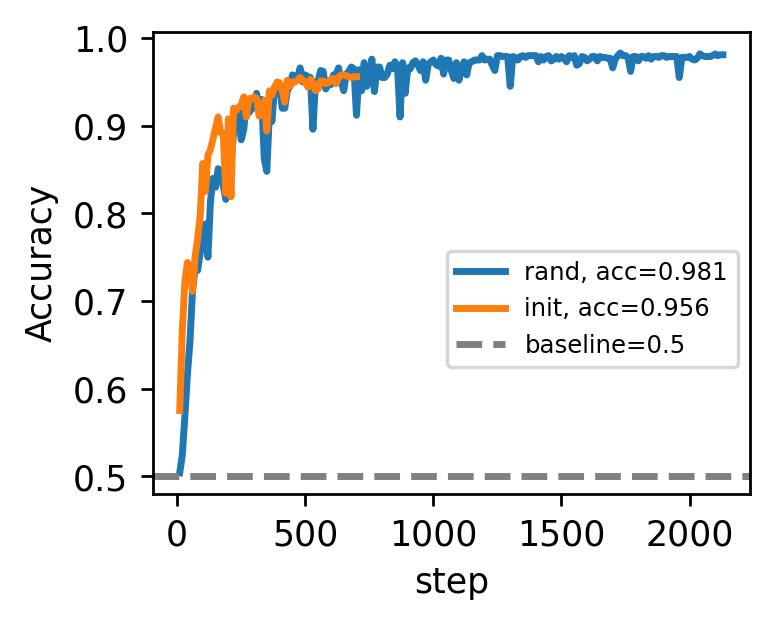

In [22]:
plt.figure(figsize=(3.2,2.6), dpi=250)
sns.lineplot(x='step', y='acc', data=rand_sc, lw=2, label=f'rand, acc={round(rand_sc["acc"].values[-1],3)}')
sns.lineplot(x='step', y='acc', data=init_sc, lw=2, label=f'init, acc={round(init_sc["acc"].values[-1],3)}')
plt.axhline(0.5,color='gray', lw=2, ls='--', label='baseline=0.5')
plt.ylabel('Accuracy')
plt.legend(loc=5,prop={'size': 7}, bbox_to_anchor=(1,0.4))
plt.tight_layout()
plt.savefig('img_0binaryacc.png', dpi=300)
plt.show()

In [9]:
plot_metrics = list(rand_sc.columns.values)
plot_metrics.remove('step')

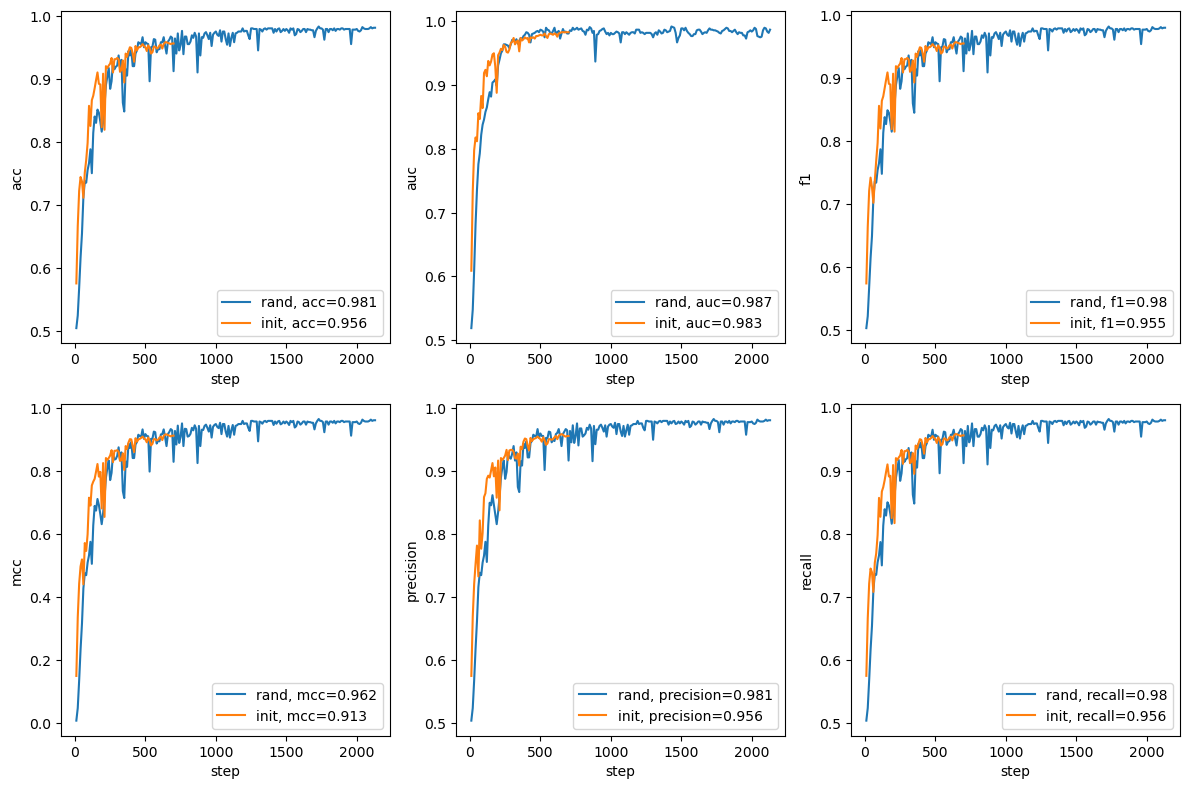

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), dpi=100)
axs = axs.flatten()

for i, metric in enumerate(plot_metrics):
    sns.lineplot(x='step', y=metric, data=rand_sc, label=f'rand, {metric}={round(rand_sc[metric].values[-1],3)}', ax=axs[i])
    sns.lineplot(x='step', y=metric, data=init_sc, label=f'init, {metric}={round(init_sc[metric].values[-1],3)}', ax=axs[i])
plt.tight_layout()
plt.show()

Compare at last common step

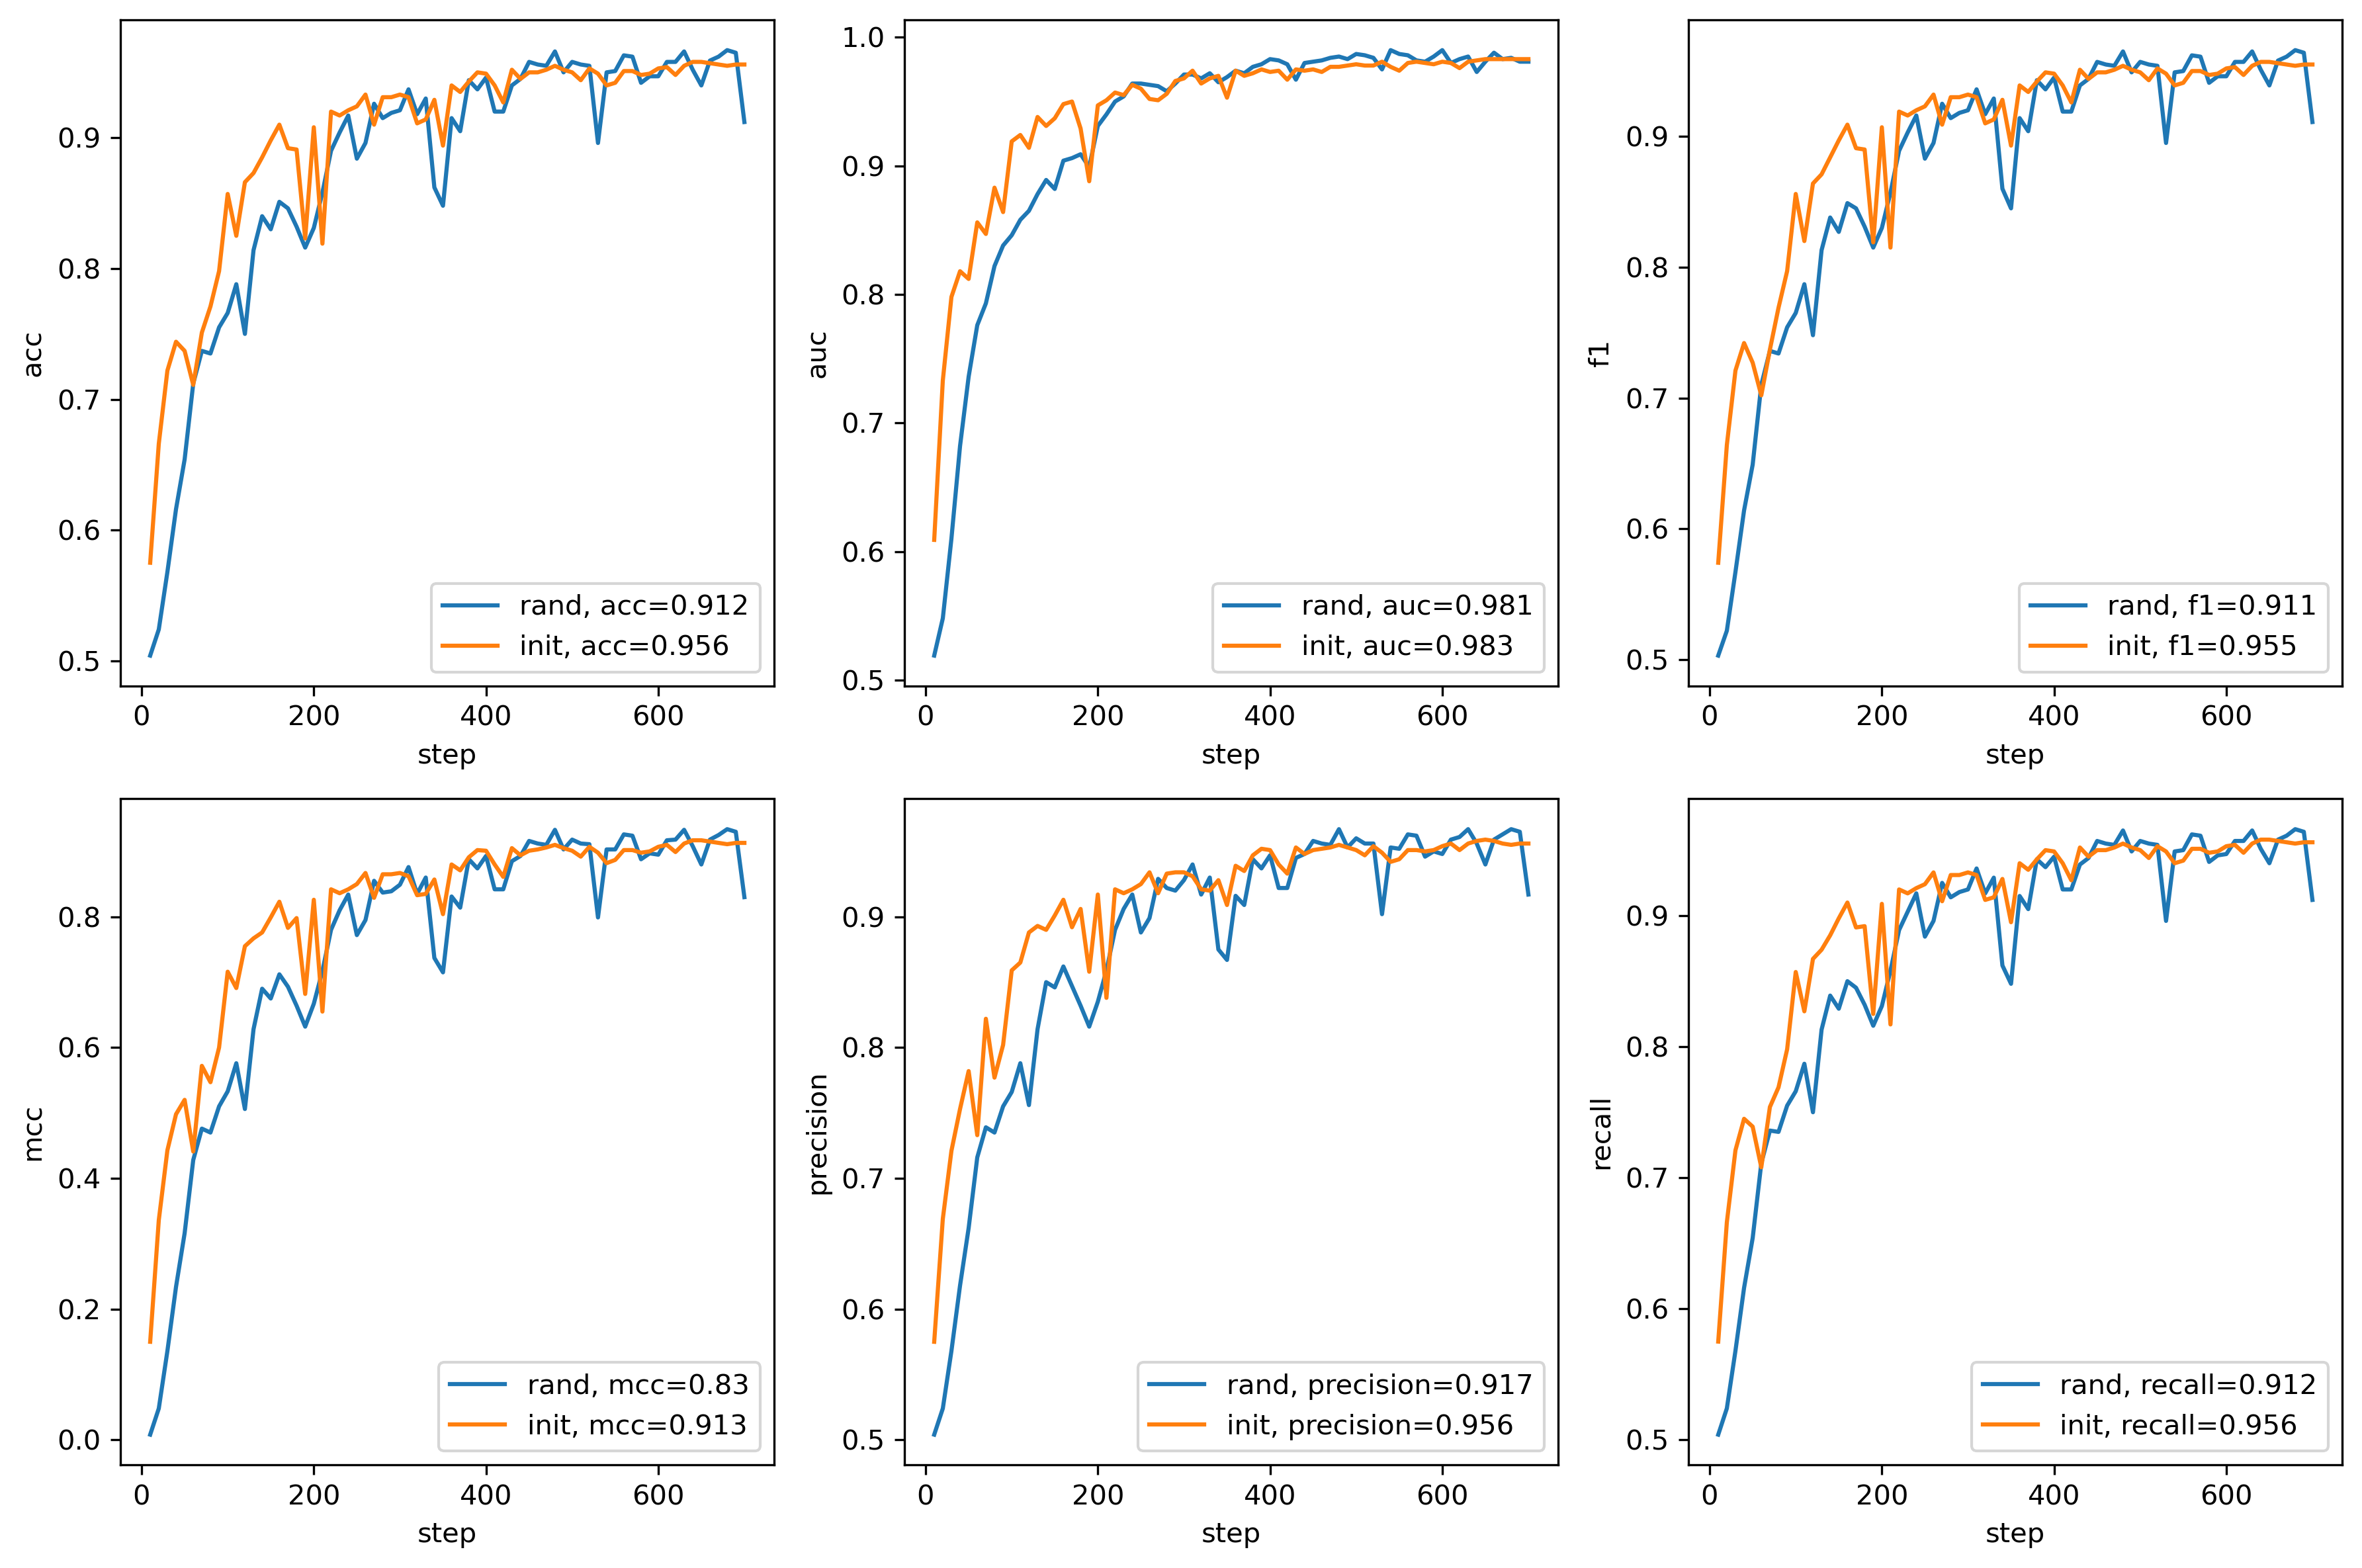

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), dpi=300)
axs = axs.flatten()

for i, metric in enumerate(plot_metrics):
    sns.lineplot(x='step', y=metric, data=rand_sc[rand_sc['step']<=700], label=f'rand, {metric}={round(rand_sc[rand_sc["step"]<=700][metric].values[-1],3)}', ax=axs[i])
    sns.lineplot(x='step', y=metric, data=init_sc, label=f'init, {metric}={round(init_sc[metric].values[-1],3)}', ax=axs[i])
plt.tight_layout()
plt.show()

More fair to compare at second to last step because rand decreased value suddenly here

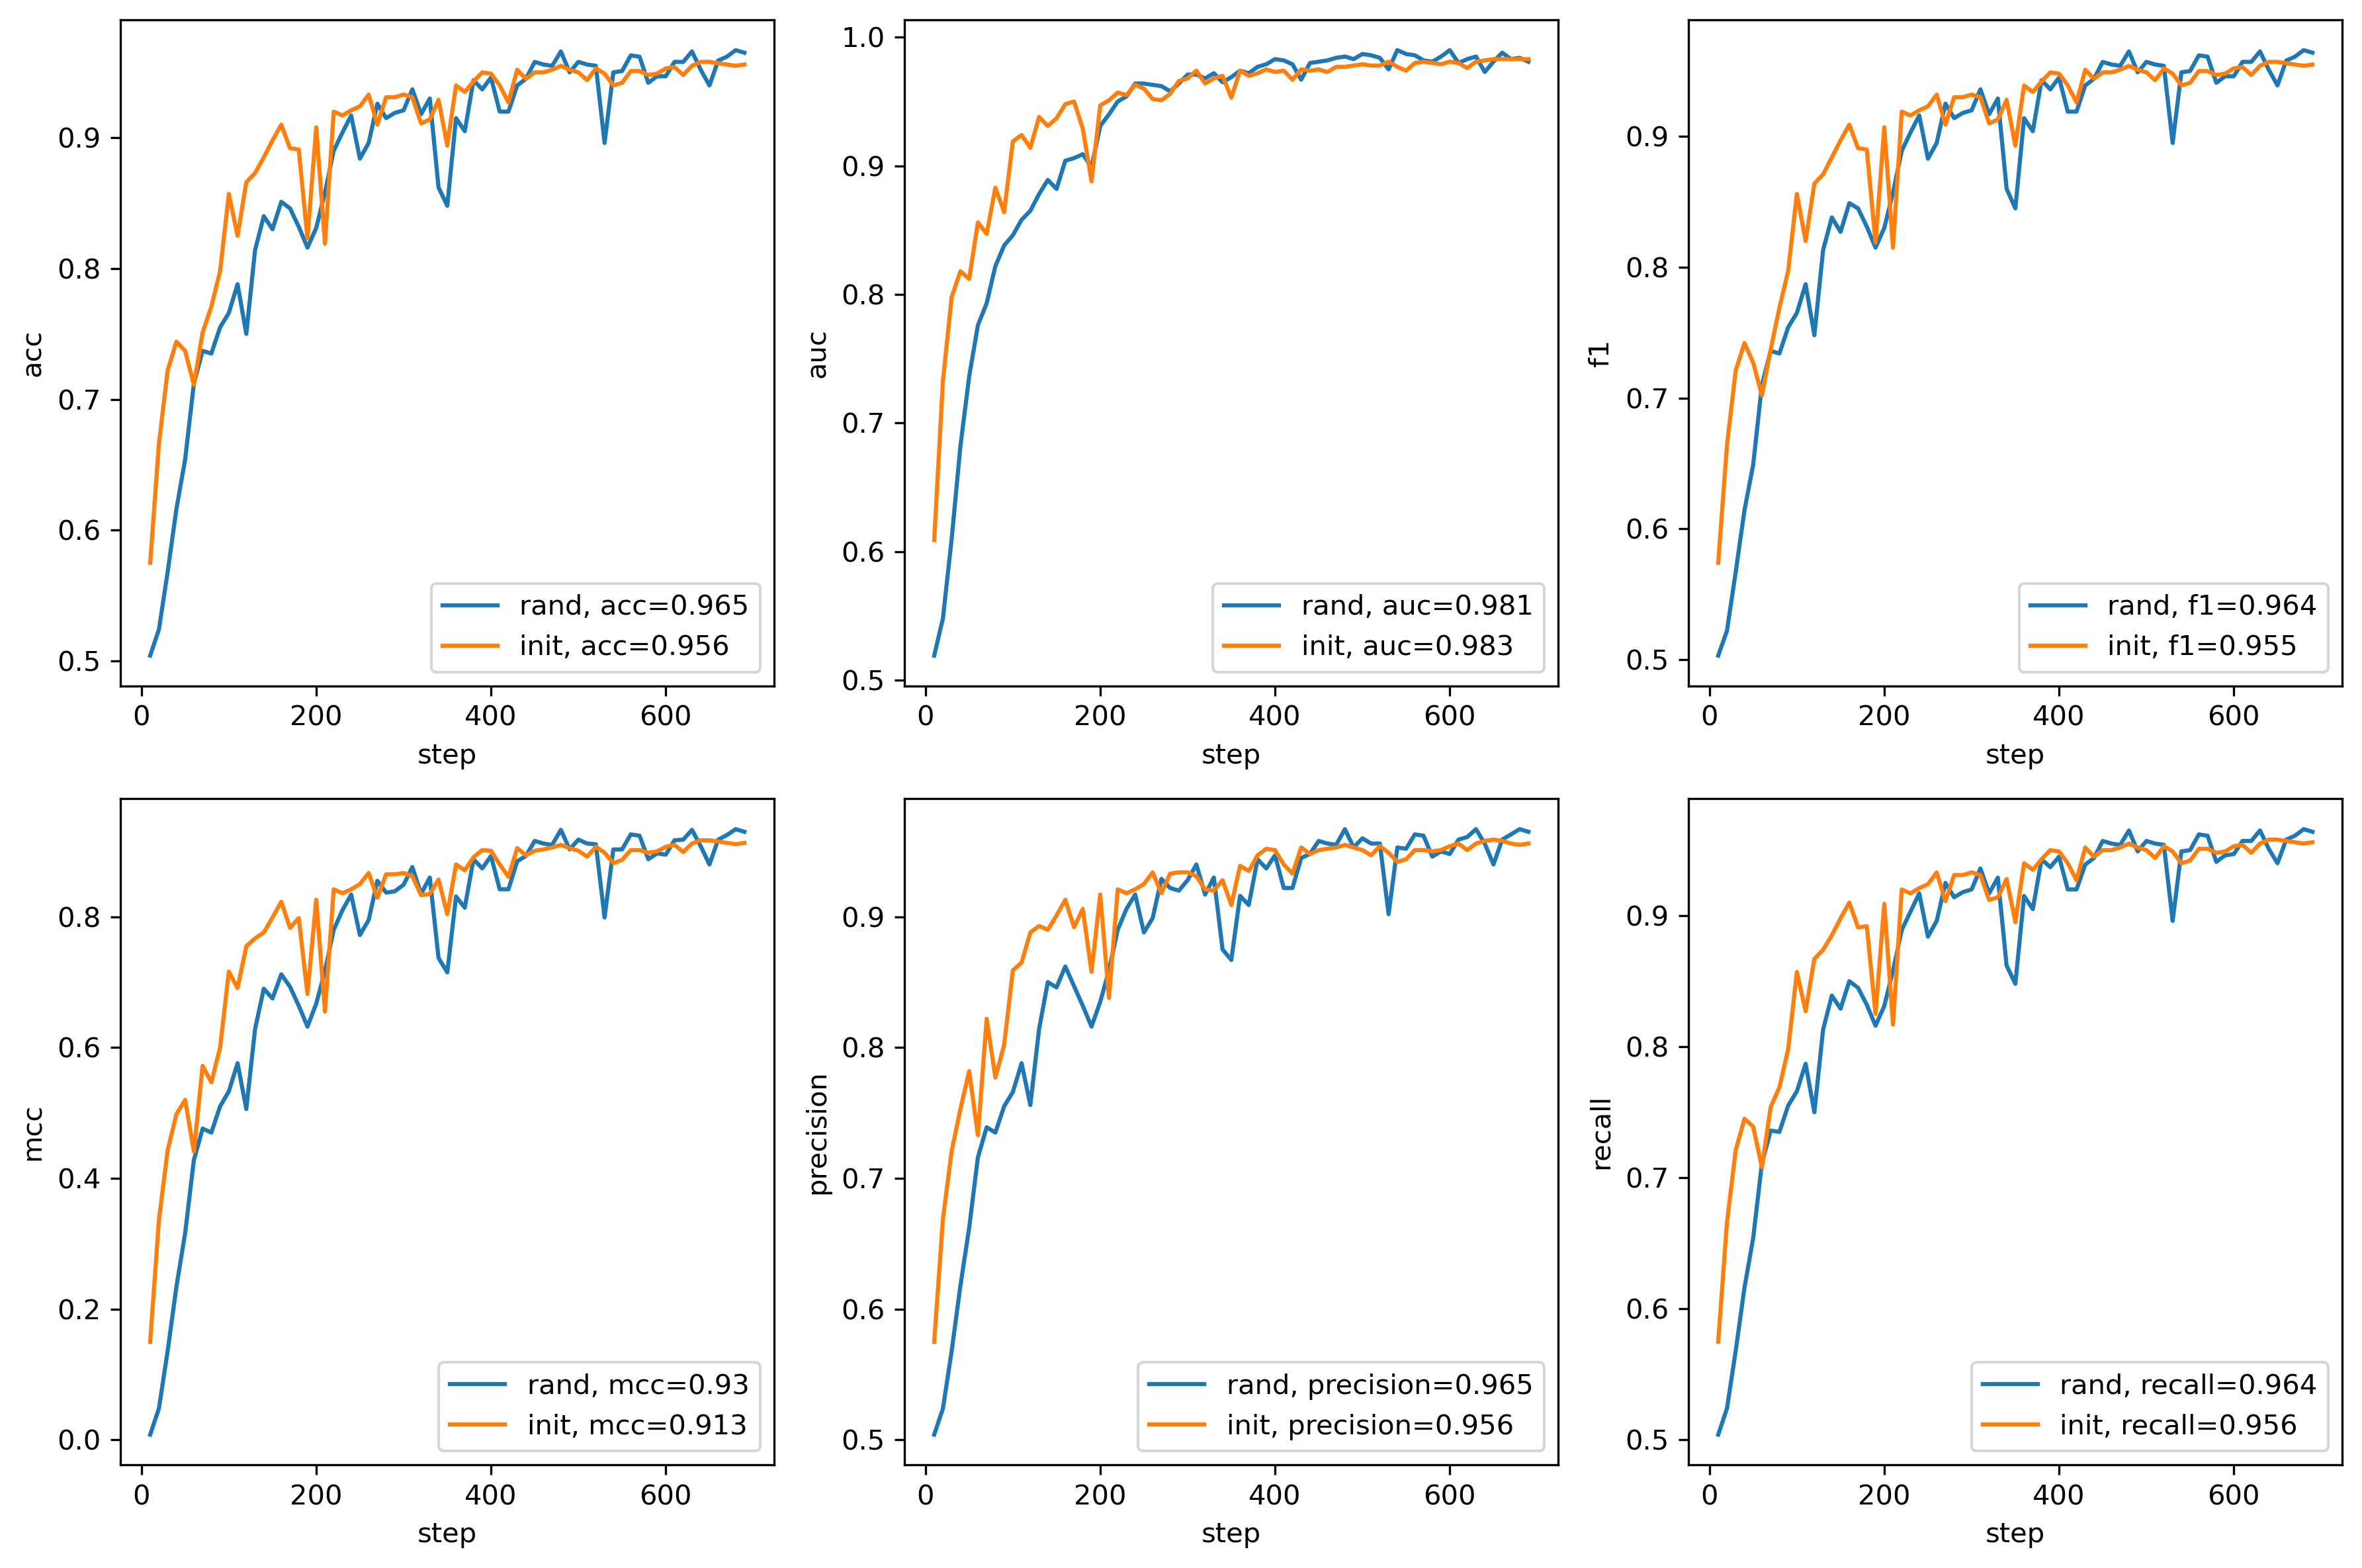

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), dpi=300)
axs = axs.flatten()

for i, metric in enumerate(plot_metrics):
    sns.lineplot(x='step', y=metric, data=rand_sc[rand_sc['step']<=699], label=f'rand, {metric}={round(rand_sc[rand_sc["step"]<=699][metric].values[-1],3)}', ax=axs[i])
    sns.lineplot(x='step', y=metric, data=init_sc[init_sc['step']<=699], label=f'init, {metric}={round(init_sc[init_sc["step"]<=699][metric].values[-1],3)}', ax=axs[i])
plt.tight_layout()
plt.show()

cannot calculate ROC because predictions were not saved